Data Collection:

The SMS Spam Collection is a public set of SMS labeled messages that have been collected for mobile phone spam research 
In this project, we applied a Recurrent Neural Network (RNN) for classifying emails as spam or non-spam. RNNs are effective for natural language processing (NLP) tasks due to their ability to understand word sequences and context. We preprocessed the email text, converting it into a numerical format for the model.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
import re
from tensorflow.keras.preprocessing.text import Tokenizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,recall_score,precision_score

In [2]:
df=pd.read_csv('Spam_SMS.csv')
df.head()

,Class,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
df.size

11148

In [4]:
df.shape

(5574, 2)

In [5]:
df.columns

Index(['Class', 'Message'], dtype='object')

In [6]:
for i in df.columns:
    print(df[i].value_counts(),i)
    print("*"*100)
    print(df[i].unique(),i)

Class
ham     4827
spam     747
Name: count, dtype: int64 Class
****************************************************************************************************
['ham' 'spam'] Class
Message
Sorry, I'll call later                                                                                                                                      30
I cant pick the phone right now. Pls send a message                                                                                                         12
Ok...                                                                                                                                                       10
Ok                                                                                                                                                           4
Ok.                                                                                                                                                          4
           

In [7]:
df.isnull().sum()

Class      0
Message    0
dtype: int64

In [8]:
dpl_rows=df.duplicated().sum()
print(dpl_rows)

415


In [9]:
df=df.drop_duplicates()

In [10]:
dpl_rows=df.duplicated().sum()
print(dpl_rows)

0


In [11]:
df.describe()

,Class,Message
count,5159,5159
unique,2,5159
top,ham,"Go until jurong point, crazy.. Available only ..."
freq,4518,1


In [12]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Class']=le.fit_transform(df['Class'])

In [13]:
features=df['Message']
target=df['Class']

xtrain,xtest,ytrain,ytest=train_test_split(features,target,test_size=0.2,random_state=18)

In [14]:
def normalize(data):
    normalized = []
    
    for i in data:
        i = i.lower()
        #get rid of urls
        i = re.sub('https?://\\S+|www\\.\\S+','',i)
        #get rid of non words and extra spaces
        i = re.sub('\\W',' ',i)
        i = re.sub('\n','',i)
        i = re.sub(' +',' ',i)
        i = re.sub('^ ','',i)
        i = re.sub(' $','',i)
        normalized.append(i)
    return normalized

x_train = normalize(xtrain)
x_test = normalize(xtest)

In [15]:
xtrain

1963    it to 80488. Your 500 free text messages are v...
3930                              Yes. Nigh you cant aha.
447     Well done, blimey, exercise, yeah, i kinda rem...
3604    I'm not sure, I was just checking out what was...
2977    I love u 2 my little pocy bell I am sorry but ...
                              ...                        
1788                           Yes:)sura in sun tv.:)lol.
3044           Your bill at 3 is £33.65 so thats not bad!
1178                           Just nw i came to hme da..
4687                    But pls dont play in others life.
3575                        Yeah sure I'll leave in a min
Name: Message, Length: 4127, dtype: object

In [16]:
ytrain

1963    1
3930    0
447     0
3604    0
2977    0
       ..
1788    0
3044    0
1178    0
4687    0
3575    0
Name: Class, Length: 4127, dtype: int32

In [17]:
max_vocab=10000
tokenizer=Tokenizer(num_words=max_vocab)
tokenizer.fit_on_texts(xtrain)

In [18]:
xtrain=tokenizer.texts_to_sequences(xtrain)
xtest=tokenizer.texts_to_sequences(xtest)

In [19]:
xtrain

[[14, 2, 1512, 13, 561, 53, 71, 562, 21, 470, 379, 1823, 1824, 2343],
 [143, 3509, 3, 244, 1028],
 [105, 233, 3510, 3511, 147, 1, 1029, 406, 445, 18, 9, 752],
 [28, 25, 170, 1, 63, 35, 1030, 50, 52, 63, 1141, 234, 5, 704],
 [1, 64, 6, 17, 11, 380, 3512, 1825, 1, 61, 90, 24, 1, 64, 6],
 [29, 28, 53],
 [1, 63, 35, 1826, 2, 149, 121, 87, 174, 2344],
 [336, 26, 5, 1827, 62, 52, 5, 446, 3, 100, 9, 41],
 [66, 2, 705, 16, 282, 86],
 [90,
  3,
  266,
  329,
  936,
  3,
  471,
  14,
  77,
  63,
  1029,
  4,
  1321,
  3513,
  211,
  157,
  427,
  12,
  3514,
  1513,
  663,
  5,
  246,
  63,
  77,
  321,
  3,
  29,
  67,
  31,
  23,
  106,
  19,
  367,
  34,
  18,
  191,
  57,
  18,
  1142,
  3515,
  19,
  5,
  336],
 [303,
  447,
  1,
  16,
  3516,
  3517,
  7,
  1322,
  1143,
  2,
  3,
  2345,
  1828,
  87,
  174,
  2346,
  1514],
 [871,
  255,
  170,
  56,
  62,
  2,
  1144,
  448,
  247,
  29,
  47,
  42,
  53,
  428,
  805,
  20,
  6,
  2,
  1515,
  283],
 [1, 79, 4, 1031, 15, 872, 3518],
 [

In [20]:
xtrain=tf.keras.preprocessing.sequence.pad_sequences(xtrain,padding='post',maxlen=256)
xtest=tf.keras.preprocessing.sequence.pad_sequences(xtest,padding='post',maxlen=256)

In [21]:
model=tf.keras.Sequential([
    tf.keras.layers.Embedding(max_vocab,128),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64,return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(16)),
    tf.keras.layers.Dense(64,activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1)
])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional (Bidirectional)        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_1 (Bidirectional)      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [22]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(),optimizer=tf.keras.optimizers.Adam(1e-4),metrics=['accuracy'])

history = model.fit(xtrain, ytrain, epochs=10,validation_split=0.1,batch_size=30,shuffle=True)

Epoch 1/10
124/124 ━━━━━━━━━━━━━━━━━━━━ 62s 364ms/step - accuracy: 0.8749 - loss: 0.6086 - val_accuracy: 0.8741 - val_loss: 0.3392
Epoch 2/10
124/124 ━━━━━━━━━━━━━━━━━━━━ 41s 332ms/step - accuracy: 0.8836 - loss: 0.3172 - val_accuracy: 0.8741 - val_loss: 0.3137
Epoch 3/10
124/124 ━━━━━━━━━━━━━━━━━━━━ 47s 378ms/step - accuracy: 0.8708 - loss: 0.2913 - val_accuracy: 0.8741 - val_loss: 0.2204
Epoch 4/10
124/124 ━━━━━━━━━━━━━━━━━━━━ 45s 359ms/step - accuracy: 0.8769 - loss: 0.2355 - val_accuracy: 0.8741 - val_loss: 0.1988
Epoch 5/10
124/124 ━━━━━━━━━━━━━━━━━━━━ 44s 351ms/step - accuracy: 0.9226 - loss: 0.1669 - val_accuracy: 0.9443 - val_loss: 0.1675
Epoch 6/10
124/124 ━━━━━━━━━━━━━━━━━━━━ 42s 335ms/step - accuracy: 0.9536 - loss: 0.1053 - val_accuracy: 0.9661 - val_loss: 0.1248
Epoch 7/10
124/124 ━━━━━━━━━━━━━━━━━━━━ 43s 348ms/step - accuracy: 0.9768 - loss: 0.0704 - val_accuracy: 0.9831 - val_loss: 0.1122
Epoch 8/10
124/124 ━━━━━━━━━━━━━━━━━━━━ 42s 339ms/step - accuracy: 0.9837 - loss: 0

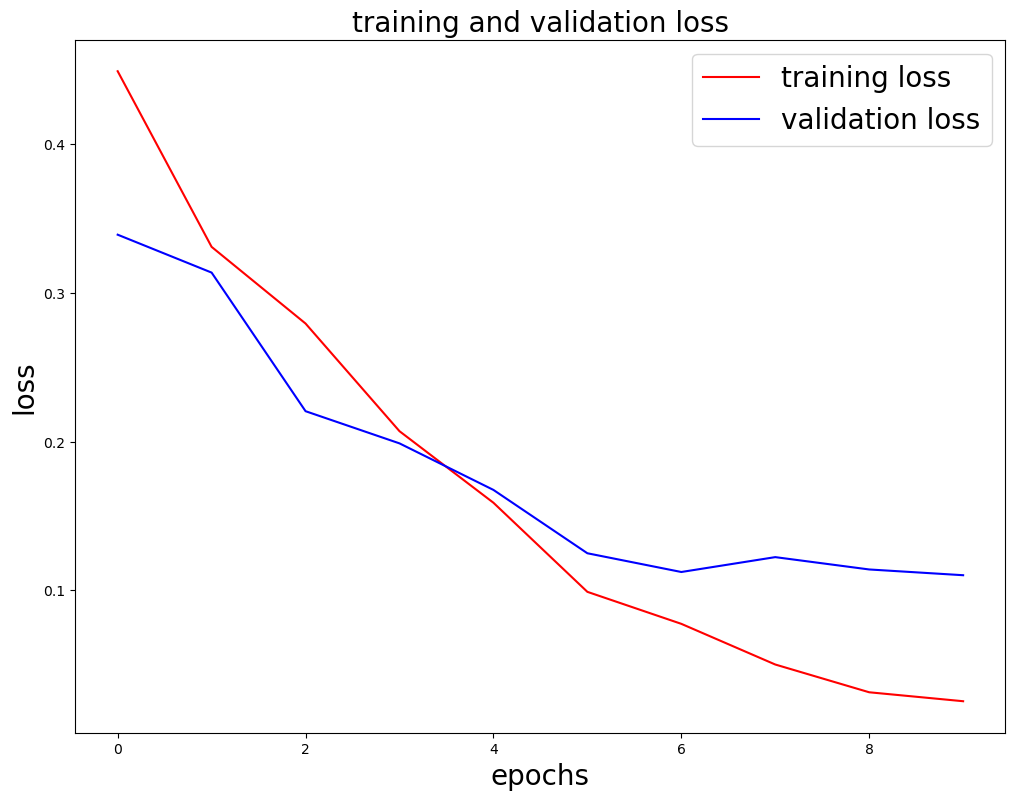

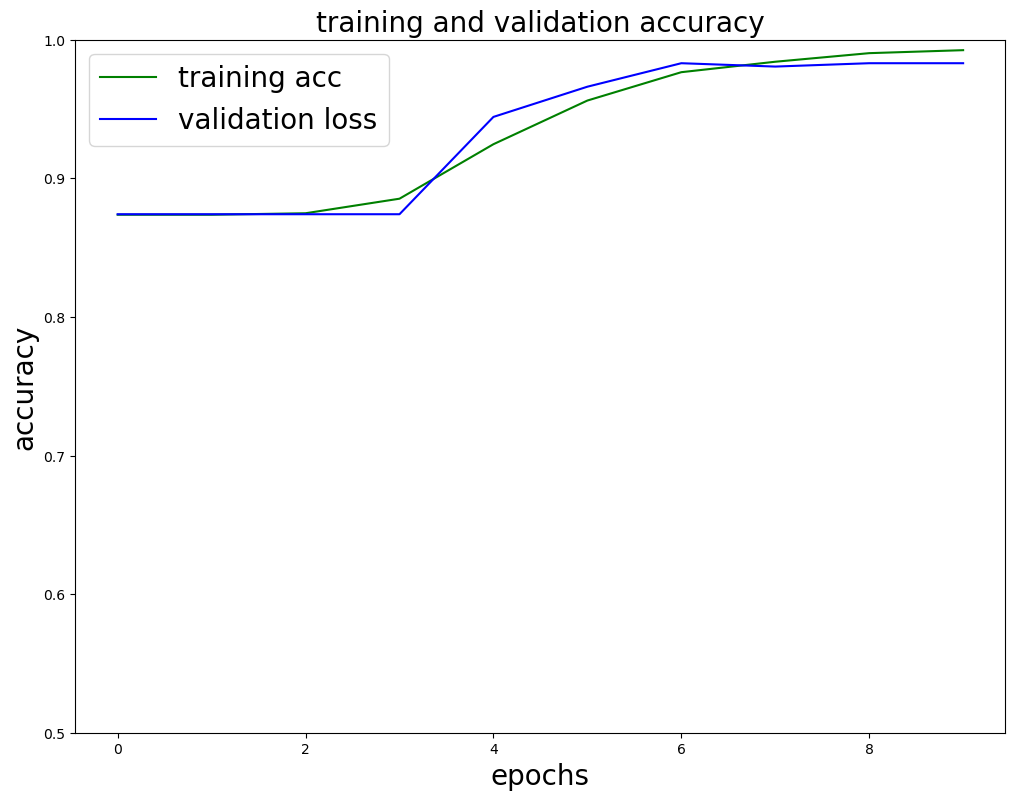

In [49]:
history_dict=history.history
acc=history_dict['accuracy']
val_acc=history_dict['val_accuracy']
loss=history_dict['loss']
val_loss=history_dict['val_loss']
epochs=history.epoch

plt.figure(figsize=(12,9))
plt.plot(epochs,loss,'r',label='training loss')
plt.plot(epochs,val_loss,'b',label='validation loss')
plt.title("training and validation loss",size=20)
plt.xlabel('epochs',size=20)
plt.ylabel('loss',size=20)
plt.legend(prop={'size':20})
plt.show()

plt.figure(figsize=(12,9))
plt.plot(epochs,acc,'g',label='training acc')
plt.plot(epochs,val_acc,'b',label='validation loss')
plt.title("training and validation accuracy",size=20)
plt.xlabel('epochs',size=20)
plt.ylabel('accuracy',size=20)
plt.legend(prop={'size':20})
plt.ylim((0.5,1))
plt.show()

In [50]:
model.evaluate(xtest,ytest)

33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 100ms/step - accuracy: 0.9835 - loss: 0.1034


[0.06616465002298355, 0.9883720874786377]

In [51]:
pred=model.predict(xtest)
binary_predictions=[]
for i in pred:
    if i>=0.5:
        binary_predictions.append(1)
    else:
        binary_predictions.append(0)

33/33 ━━━━━━━━━━━━━━━━━━━━ 6s 142ms/step


In [53]:
binary_predictions

[0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,


In [54]:
print('accuracy on testing set:', accuracy_score(binary_predictions,ytest))
print('precision on testing set:', precision_score(binary_predictions,ytest))
print('recall on testing set:', recall_score(binary_predictions,ytest))

accuracy on testing set: 0.9883720930232558
precision on testing set: 0.925
recall on testing set: 0.9736842105263158


In [55]:
predicts=['Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005']

In [56]:
predicts=normalize(predicts)

In [57]:
predicts=tokenizer.texts_to_sequences(predicts)

In [58]:
predicts=tf.keras.preprocessing.sequence.pad_sequences(predicts,padding='post',maxlen=256)

In [59]:
print(predicts)

[[  53  535    8   17    4  937  954    2  215 3089 1031  725 3090 2645
   272 2343    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0   

In [60]:
pred=model.predict(predicts)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step


In [61]:
pred

array([[1.0359983]], dtype=float32)

In [63]:
if pred>=0.5:
    pred=1
else:
    pred=0

In [64]:
pred

1